<a href="https://colab.research.google.com/github/yanncoadou/MLtutorials/blob/main/Code%20snipets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Collected bits and pieces</h1>

# Plot training and validation curves with uncertainty from CV

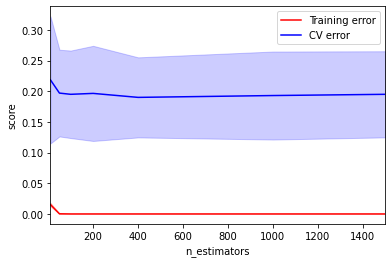

In [ ]:
from sklearn.model_selection import validation_curve

# Evaluate parameter range in CV
param_range = [10,50,100,200,400,1000,1500] #range(1, 400)
param_name = "n_estimators"

train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, 
    param_name=param_name, 
    param_range=param_range, cv=3, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot parameter VS estimated error
plt.xlabel(param_name)
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, 1. - train_scores_mean, color="red", label="Training error")
plt.fill_between(param_range, 
                 1. - train_scores_mean + train_scores_std,
                 1. - train_scores_mean - train_scores_std,
                 alpha=0.2, color="red")
plt.plot(param_range, 1. - test_scores_mean, color="blue", label="CV error")
plt.fill_between(param_range, 
                 1. - test_scores_mean + test_scores_std,
                 1. - test_scores_mean - test_scores_std, 
                 alpha=0.2, color="blue")
plt.legend(loc="best")